# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [2]:
env = UnityEnvironment(file_name='Crawler_Linux/Crawler.x86_64')

Found path: /home/sagarnildass/python_notebooks/Udacity-Deep-Reinforcement-Learning/my_codes/p2_continuous-control/Crawler_Linux/Crawler.x86_64
Mono path[0] = '/home/sagarnildass/python_notebooks/Udacity-Deep-Reinforcement-Learning/my_codes/p2_continuous-control/Crawler_Linux/Crawler_Data/Managed'
Mono config path = '/home/sagarnildass/python_notebooks/Udacity-Deep-Reinforcement-Learning/my_codes/p2_continuous-control/Crawler_Linux/Crawler_Data/MonoBleedingEdge/etc'
Preloaded 'ScreenSelector.so'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	ScreenSelector.so
	libgrpc_csharp_ext.x86.so
Logging to /home/sagarnildass/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.0609

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.17565144637289146


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from crawler_agent import Agent
import time
plt.ion()

In [10]:

def train(env, agent, n_episodes=500, max_t=1000, display_every=10):
    scores = []
    scores_window = deque(maxlen=100)
        
    for i_episode in range(1, n_episodes + 1):    
        env_info = env.reset(train_mode=True)[brain_name]
        
        n_actors = len(env_info.vector_observations)
        score = np.zeros(n_actors)

        episode_length_list = []
        episode_counter = np.zeros(n_actors)
        
        for t in range(1, max_t+1):
            states = env_info.vector_observations
                        
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = np.array(env_info.rewards)                
            dones = env_info.local_done
            
            agent.step(states, actions, rewards, next_states, dones, std_scale=1)
            
            score += np.array(rewards)
            score = np.where(dones, 0, score)
            
        mean_score = score.mean()
        scores_window.append(mean_score)       # save most recent score
        scores.append(mean_score)              # save most recent score
        
        print('\rEpisode {}\tAverage score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % display_every == 0:
            print('\rEpisode {}\tAverage score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window) >= 500:
            print('\nEnvironment solved in {:d} episodes!\tAverage score: {:.2f}'.format(np.maximum(i_episode, 0), np.mean(scores_window)))
            
            agent.save('crawler-weights.pth')
            break
    
    return scores

In [7]:
agent = Agent(
    state_size=state_size, 
    action_size=action_size,
    value_loss_weight=1.0,
    gradient_clip=0.25,
    ppo_ratio_clip_epsilon=0.1,
    trajectory_length=1000,
    gamma=0.9,
    gae_lambda=0.95,
    optimization_steps=32,
    batch_size=1024,
    entropy_penalty_weight=0.01,
    optimizer_learning_rate=5e-6,
    optimizer_weight_decay=1e-4,
    optimizer_epsilon=1e-5,
    std_init=-2.5
)

In [12]:
scores = train(env, agent, n_episodes=2000, max_t=1000, display_every=10)


Episode 10	Average score: 54.83
Episode 20	Average score: 55.82
Episode 30	Average score: 57.17
Episode 40	Average score: 59.21
Episode 50	Average score: 62.43
Episode 60	Average score: 66.61
Episode 70	Average score: 70.44
Episode 80	Average score: 73.32
Episode 90	Average score: 75.64
Episode 100	Average score: 77.44
Episode 110	Average score: 81.77
Episode 120	Average score: 86.49
Episode 130	Average score: 91.42
Episode 140	Average score: 96.63
Episode 150	Average score: 101.18
Episode 160	Average score: 105.21
Episode 170	Average score: 109.36
Episode 180	Average score: 113.44
Episode 190	Average score: 118.10
Episode 200	Average score: 123.70
Episode 210	Average score: 129.22
Episode 220	Average score: 135.08
Episode 230	Average score: 140.15
Episode 240	Average score: 145.04
Episode 250	Average score: 149.72
Episode 260	Average score: 154.56
Episode 270	Average score: 159.57
Episode 280	Average score: 164.69
Episode 290	Average score: 169.50
Episode 300	Average score: 174.18
Epi

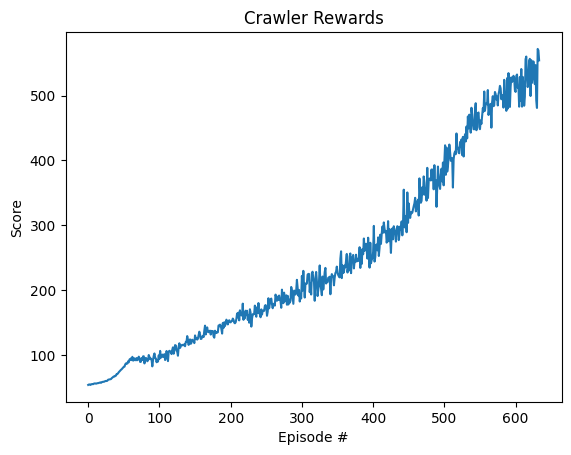

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.title('Crawler Rewards')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
# load the weights from file
agent.load('crawler-weights.pth')

# Run through once with loaded model
env_info = env.reset(train_mode=False)[brain_name]            # reset the environment    
states = env_info.vector_observations                         # get the current state (for each agent)
scores = np.zeros(num_agents)                                 # initialize the score (for each agent)
for t in range(1000):
    actions = agent.act(states)             # get actions from model (for each agent)
    env_info = env.step(actions)[brain_name]                  # send all actions to tne environment
    next_states = env_info.vector_observations                # get next state (for each agent)
    rewards = env_info.rewards                                # get reward (for each agent)
    dones = env_info.local_done                               # see if episode finished
    scores += env_info.rewards                                # update the score (for each agent)
    states = next_states                                      # roll over states to next time step
    if np.any(dones):                                         # exit loop if episode finished
        break

print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 473.5747804396281


In [11]:
env.close()